# Checking properties of O-U environments

In [1]:
import numpy as np
from scipy.stats import multivariate_normal as multinom
from scipy.stats import norm
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

In [2]:
nbbins   = 40
alpha    = 1e-3
lalpha   = np.logspace(-3,2,nbbins)
sig2_e   = 1
nbsteps1 = 20
nbsteps2 = 40
Tmax     = 100000
tau      = 10

In [3]:
def GenerateEnvironment (a=alpha, s2=sig2_e, n = nbsteps1*Tmax, time=tau*Tmax):
    """This function, for a given autocorrelation r and environmental standard deviation s, generates an AR[1] sequence of length n
    Keep in mind that a discretized (in steps of size dt) O-U process with parameters (a,s2) is an AR[1] process with parameters (exp(-alpha dt), sqrt(s2(1-exp(-2alpha dt))))"""
    x= ArmaProcess([1,-np.exp(-a*time/n)]).generate_sample(n,scale=np.sqrt(s2*(1-np.exp(-2 * a *time/n))))
    return x

In [4]:
def S0 (x):
    return  1                                 - np.exp(-x)
def S1 (x):
    return -1 + x                             + np.exp(-x)
def S2 (x):
    return  1 - x + x**2/2                    - np.exp(-x)
def S3 (x):
    return -1 + x - x**2/2 + x**3/6           + np.exp(-x)
def S4 (x):
    return  1 - x + x**2/2 - x**3/6 + x**4/24 - np.exp(-x)

In [5]:
tmp  = [0]*nbbins
lTh1 = [0]*nbbins
lNu1 = [0]*nbbins
for k in range(nbbins):
    tmp = GenerateEnvironment(a=lalpha[k],n=nbsteps1*Tmax)
    lTh1[k] = [np.mean( tmp[nbsteps1*i : nbsteps1*(i+1)] ) for i in range(Tmax)]
    lNu1[k] = [np.var(  tmp[nbsteps1*i : nbsteps1*(i+1)] ) for i in range(Tmax)]
lTh1 = np.array(lTh1)
lNu1 = np.array(lNu1)

tmp  = [0]*nbbins
lTh2 = [0]*nbbins
lNu2 = [0]*nbbins
for k in range(nbbins):
    tmp = GenerateEnvironment(a=lalpha[k],n=nbsteps2*Tmax)
    lTh2[k] = [np.mean( tmp[nbsteps2*i : nbsteps2*(i+1)] ) for i in range(Tmax)]
    lNu2[k] = [np.var(  tmp[nbsteps2*i : nbsteps2*(i+1)] ) for i in range(Tmax)]
del(tmp)
lTh2 = np.array(lTh2)
lNu2 = np.array(lNu2)

In [6]:
print("E(Θ): expected 0, seen: "+str(np.mean(lTh,axis=1)))

E(Θ): expected 0, seen: [ 3.18134289e-02  7.56956951e-04  2.87807247e-02 -9.43189729e-03
 -6.71503973e-03 -3.42380610e-02  2.62009243e-02 -1.61286551e-02
  3.14348594e-03  9.99714603e-03 -2.39614233e-02  7.44402283e-04
 -8.93131758e-05 -3.22303895e-04  1.94758455e-03 -1.92042867e-03
 -7.63341618e-03 -4.61646284e-04  3.28029494e-03 -1.06220374e-03
 -3.52399704e-04  5.63261875e-04 -1.28837713e-03 -1.75765492e-03
  4.33049820e-04  1.08792145e-03 -1.58725653e-04 -3.75855335e-04
  6.50184953e-05 -8.55022367e-04  5.94098215e-05 -3.21595317e-04
  9.12788781e-06 -6.80095933e-04 -5.08909763e-04 -1.25121506e-04
  1.30343738e-05 -1.08729919e-03  5.68064283e-04  6.29751452e-05]


Text(0, 0.5, 'Var(Θ)')

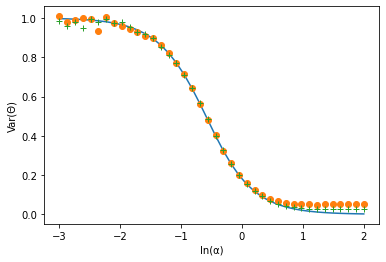

In [7]:
ThvarT = 2/(lalpha*tau)**2 * S1(lalpha*tau)
ThvarE1= np.var(lTh1,axis=1)
ThvarE2= np.var(lTh2,axis=1)
plt.plot(np.log10(lalpha),ThvarT)
plt.plot(np.log10(lalpha),ThvarE1,"o")
plt.plot(np.log10(lalpha),ThvarE2,"+")
plt.xlabel("log(α)")
plt.ylabel("Var(Θ)")

Text(0, 0.5, 'E(Θ(t)Θ(t+1))')

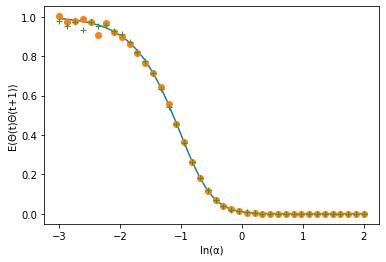

In [9]:
ThcovarT = 1/(lalpha*tau)**2 * S0(lalpha*tau)**2
ThcovarE1= [ np.mean( lTh1[k][:-1] * lTh1[k][1:] ) for k in range(nbbins)]
ThcovarE2= [ np.mean( lTh2[k][:-1] * lTh2[k][1:] ) for k in range(nbbins)]
plt.plot(np.log10(lalpha),ThcovarT)
plt.plot(np.log10(lalpha),ThcovarE1,"o")
plt.plot(np.log10(lalpha),ThcovarE2,"+")
plt.xlabel("log(α)")
plt.ylabel("E(Θ(t)Θ(t+1))")

Text(0, 0.5, 'E(ν²)')

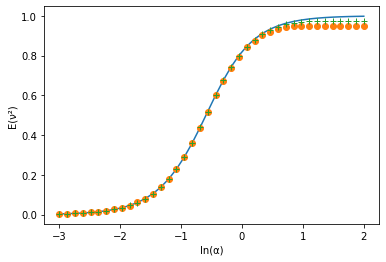

In [10]:
lTheo = 2/(lalpha*tau)**2 * S2(lalpha*tau)
lExpm1= np.mean(lNu1,axis=1)
lExpm2= np.mean(lNu2,axis=1)
plt.plot(np.log10(lalpha),lTheo)
plt.plot(np.log10(lalpha),lExpm1,"o")
plt.plot(np.log10(lalpha),lExpm2,"+")
plt.xlabel("log(α)")
plt.ylabel("E(ν²)")

Text(0, 0.5, 'Var(ν²)')

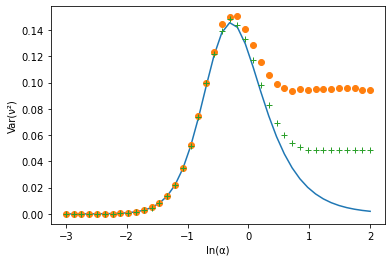

In [11]:
lTheo = 1/(lalpha*tau)**3 * (
        32*S2(lalpha*tau)  - 4  *S2(2*lalpha*tau)
    + (-8 *S1(lalpha*tau)  + 1  *S1(2*lalpha*tau))* lalpha*tau    
)+ 2*ThvarT**2

lExpm1= np.var(lNu1,axis=1)
lExpm2= np.var(lNu2,axis=1)
plt.plot(np.log10(lalpha),lTheo)
plt.plot(np.log10(lalpha),lExpm1,"o")
plt.plot(np.log10(lalpha),lExpm2,"+")
plt.xlabel("log(α)")
plt.ylabel("Var(ν²)")

Text(0, 0.5, 'E(ν²(t)Θ²(t+1))')

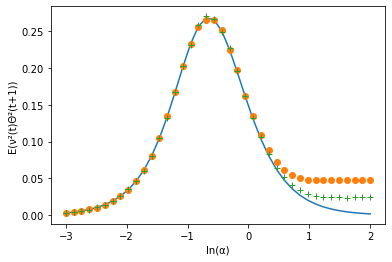

In [12]:
lTheo = 1/(lalpha*tau)**4 * S0(lalpha*tau)**3 *(
            2 *S1(lalpha*tau)  -  S0(lalpha*tau) * lalpha*tau
) + 2/(lalpha*tau)**2 * S2(lalpha*tau) * 2/(lalpha*tau)**2 * S1(lalpha*tau)# add E(Nu2)E(Th2)

lExpm1= [ np.mean( lNu1[k][:-1] * lTh1[k][1:]**2 )
         for k in range(nbbins)]
lExpm2= [ np.mean( lNu2[k][:-1] * lTh2[k][1:]**2 )
         for k in range(nbbins)]
plt.plot(np.log10(lalpha),lTheo)
plt.plot(np.log10(lalpha),lExpm1,"o")
plt.plot(np.log10(lalpha),lExpm2,"+")
plt.xlabel("log(α)")
plt.ylabel("E(ν²(t)Θ²(t+1))")

Text(0, 0.5, 'E(ν²(t)Θ(t)Θ(t+1))')

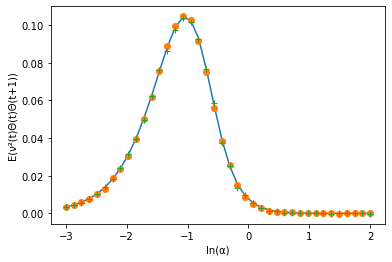

In [13]:
lTheo = 1/(lalpha*tau)**4 * S0(lalpha*tau) * (
            12 *S2(lalpha*tau)  - 6  *S2(2*lalpha*tau)
         +( 2*S1(lalpha*tau)  + 1  *S1(2*lalpha*tau))*lalpha*tau
         +  3 *S0(lalpha*tau)  * (lalpha*tau)**2
)

lExpm1= [ np.mean( lNu1[k][:-1] * lTh1[k][:-1] * lTh1[k][1:] )
         for k in range(nbbins)]
lExpm2= [ np.mean( lNu2[k][:-1] * lTh2[k][:-1] * lTh2[k][1:] )
         for k in range(nbbins)]
plt.plot(np.log10(lalpha),lTheo)
plt.plot(np.log10(lalpha),lExpm1,"o")
plt.plot(np.log10(lalpha),lExpm2,"+")
plt.xlabel("log(α)")
plt.ylabel("E(ν²(t)Θ(t)Θ(t+1))")

Text(0, 0.5, 'E(ν²(t)Θ(t)²)')

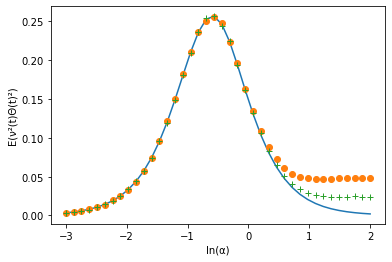

In [15]:
lTheo = 1/(lalpha*tau)**4 * (
        24 *S3(lalpha*tau)  - 12 *S3(2*lalpha*tau)
    + ( 8  *S2(lalpha*tau)  + 2*S2(2*lalpha*tau))*lalpha*tau
    +   6  *S1(lalpha*tau) * (lalpha*tau)**2
)


lExpm1= [ np.mean( lNu1[k] * lTh1[k]**2 )
         for k in range(nbbins)]
lExpm2= [ np.mean( lNu2[k] * lTh2[k]**2 )
         for k in range(nbbins)]
plt.plot(np.log10(lalpha),lTheo)
plt.plot(np.log10(lalpha),lExpm1,"o")
plt.plot(np.log10(lalpha),lExpm2,"+")
plt.xlabel("log(α)")
plt.ylabel("E(ν²(t)Θ(t)²)")

In [30]:
th    = GenerateEnvironment(n=nbsteps*5,time=tau*5)
x1    = np.linspace(0,tau*5,nbsteps*5)
x2    = [x for x in np.linspace(0,tau*5,5) for _ in range(2)][1:]
means = [np.mean(th[k*nbsteps:(k+1)*nbsteps]) for k in range(5) for _ in range(2)][:-1]

Text(0, 0.5, 'θ')

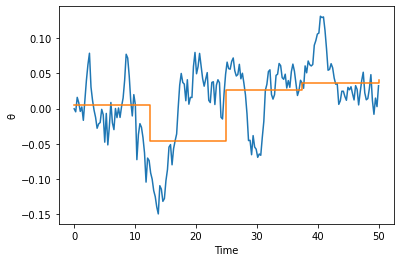

In [31]:
plt.plot(x1,th)
plt.plot(x2,means)
plt.xlabel("Time")
plt.ylabel("θ")